<h1 style="font-size: 1.6rem; font-weight: bold">ITO 5047: Fundamentals of Artificial Intelligence</h1>
<h1 style="font-size: 1.6rem; font-weight: bold">Machine Learning Methods: Regression</h1>
<p style="margin-top: 5px; margin-bottom: 5px;">Monash University Australia</p>
<p style="margin-top: 5px; margin-bottom: 5px;">Jupyter Notebook by: Tristan Sim Yook Min</p>
References: Information Source from Monash Faculty of Information Technology

---

### **Regression**

In regression, our objective is to predict a continuous value. For instance, determining the power consumption of industrial equipment based on its size.

Looking at the industrial equipment diagram, we can see that as equipment size increases from tiny to large, the power consumption generally increases from low to high. We want to predict the power consumption of a motor (highlighted in the blue box) given its medium size.

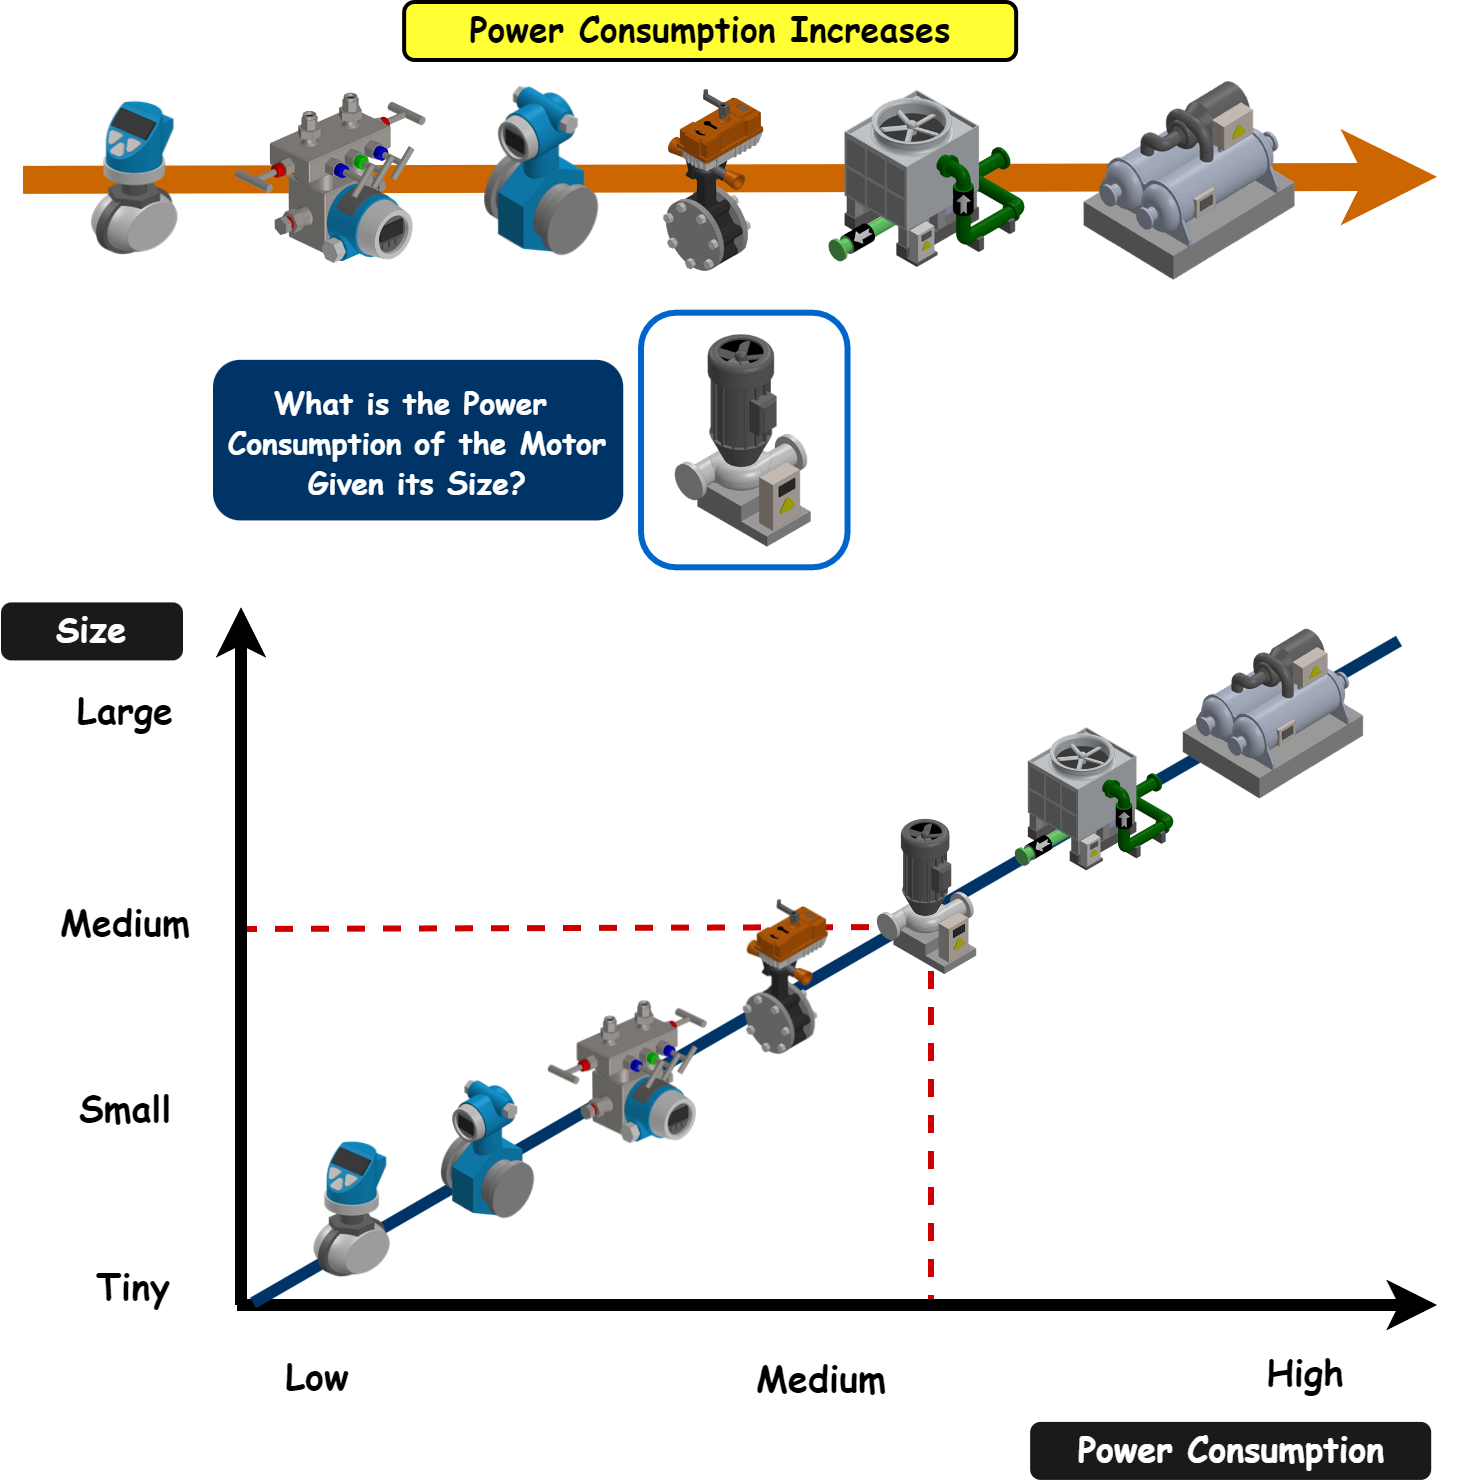

#### **Examples of Regression Applications**
- Predicting power consumption of industrial motors based on size and specifications
- Estimating stock prices from continuous attributes like company profit, debt, and cash flow
- Forecasting equipment maintenance costs based on usage patterns

#### **Mathematical Foundation**
Given a training set of data points (x₁, y₁), ..., (xₙ, yₙ), we assume:
- **xⱼ ∈ ℝᵐ** (features are real-valued vectors)
- **yⱼ ∈ ℝ** (target values are continuous)

From this point forward, we assume our data is continuous.

---

### **Univariate Linear Regression**

Given a training set of N continuous valued pairs: (x₁, y₁), ..., (xₙ, yₙ), we aim to learn a linear function with two coefficients to predict y from x.

We want to learn the parameters w₀ and w₁ such that:
$$h_w(x) = w_1x + w_0$$

#### **Loss Function**
The loss function for our model is the sum over all N data points of the square of the difference between our predicted value for y and the actual value of y.

**Loss:** Square of the difference between the true and predicted target value for xⱼ:
$$Loss(h_w) = \sum_{j=1}^{N}(y_j - h_w(x_j))^2 = \sum_{j=1}^{N}(y_j - (w_1x_j + w_0))^2$$

So, for linear regression for a model hw trained on a dataset:
$$D = \{(x_1, y_1), ..., (x_N, y_N)\}, x_j ∈ ℝᵐ, y_j ∈ ℝ$$

the loss function is:
$$Loss(h_w) = \sum_{j=1}^{N}(y_j - h_w(x_j))^2$$

This loss function is called the **sum of squares error (SSE)** or **residual sum of squares (RSS)**, and can also be applied as a loss function to other regression algorithms.

#### **Alternative Loss Functions for Regression**
We may also use other loss functions for regression:

**Mean Absolute Error (MAE):**
$$MAE(h_w) = \frac{1}{N}\sum_{j=1}^{N}|y_j - h_w(x_j)|$$

**Root Mean Squared Error (RMSE):**
$$RMSE(h_w) = \sqrt{\frac{1}{N}\sum_{j=1}^{N}(y_j - h_w(x_j))^2}$$

#### **Learning the Parameters**
To learn the parameters, we seek to find the coefficients w* = (w₀*, w₁*) that minimise the loss function Loss(hw) on the training data.

We can accomplish this by finding the derivative of the loss function and setting it to 0.

- **Loss(hw)** is a convex function, so w* is unique
- Find w* by setting the derivative to 0:
$$\frac{∂}{∂w_j}Loss(h_w) = 0$$

Then we solve the values for w with an iterative algorithm like gradient descent, though our simple linear function hw = w₁x + w₀ has an analytic solution with the given formulas we can use directly to find the values for w₀ and w₁.

**Analytic Solution Formulas:**
$$w_0 = \frac{\sum y_j - w_1 \sum x_j}{N}$$

$$w_1 = \frac{N\sum x_jy_j - \sum x_j \sum y_j}{N\sum x_j^2 - (\sum x_j)^2}$$

#### **Example Calculation**
Computing the analytic solution in practice requires the computation of a slow matrix inverse unless the data size is small. When data size is large, gradient descent is preferred.

This example uses analytic formulas. With the 3 data points given, we compute the values shown for w₁ and w₀.

**Training data:** (1, 3), (2, 1, 0.5), (-5, 6.2)
**Linear regression model:** hw = w₁x + w₀

**For w₁:**
$$w_1 = \frac{3(1×3 + 2.1×0.5 + (-5)×6.2) - (1 + 2.1 - 5)(3 + 0.5 + 6.2)}{3(1² + 2.1² + (-5)²) - (1 + 2.1 - 5)²}$$
$$= -0.712$$

**For w₀:**
$$w_0 = \frac{(3 + 0.5 + 6.2) - w_1(1 + 2.1 - 5)}{3}$$
$$= 2.78$$

**Final Model:** hw = -0.712x + 2.78

We can plot the 3 data points and the solution we found to see how it fits the data. The linear regression line represents the best fit through the training points, minimising the sum of squared errors.

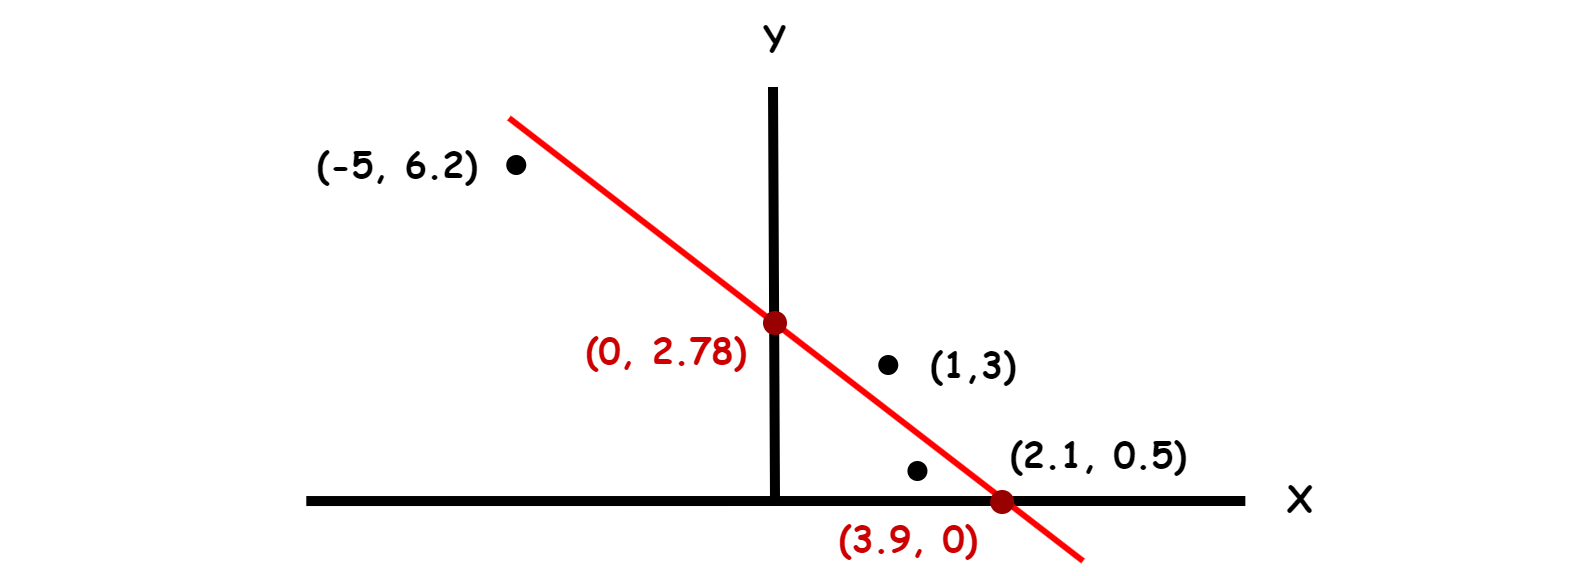

---

### **Gradient Descent**

The fundamental principle of the gradient descent algorithm is that we iteratively move towards a function minimum by using the gradient to indicate the direction of steepest descent and taking small steps in that direction.

Think of it like hiking down a mountain in dense fog - you can't see the bottom, but you can feel which direction slopes downward most steeply. By consistently taking steps in the steepest downward direction, you'll eventually reach the valley floor (the minimum).

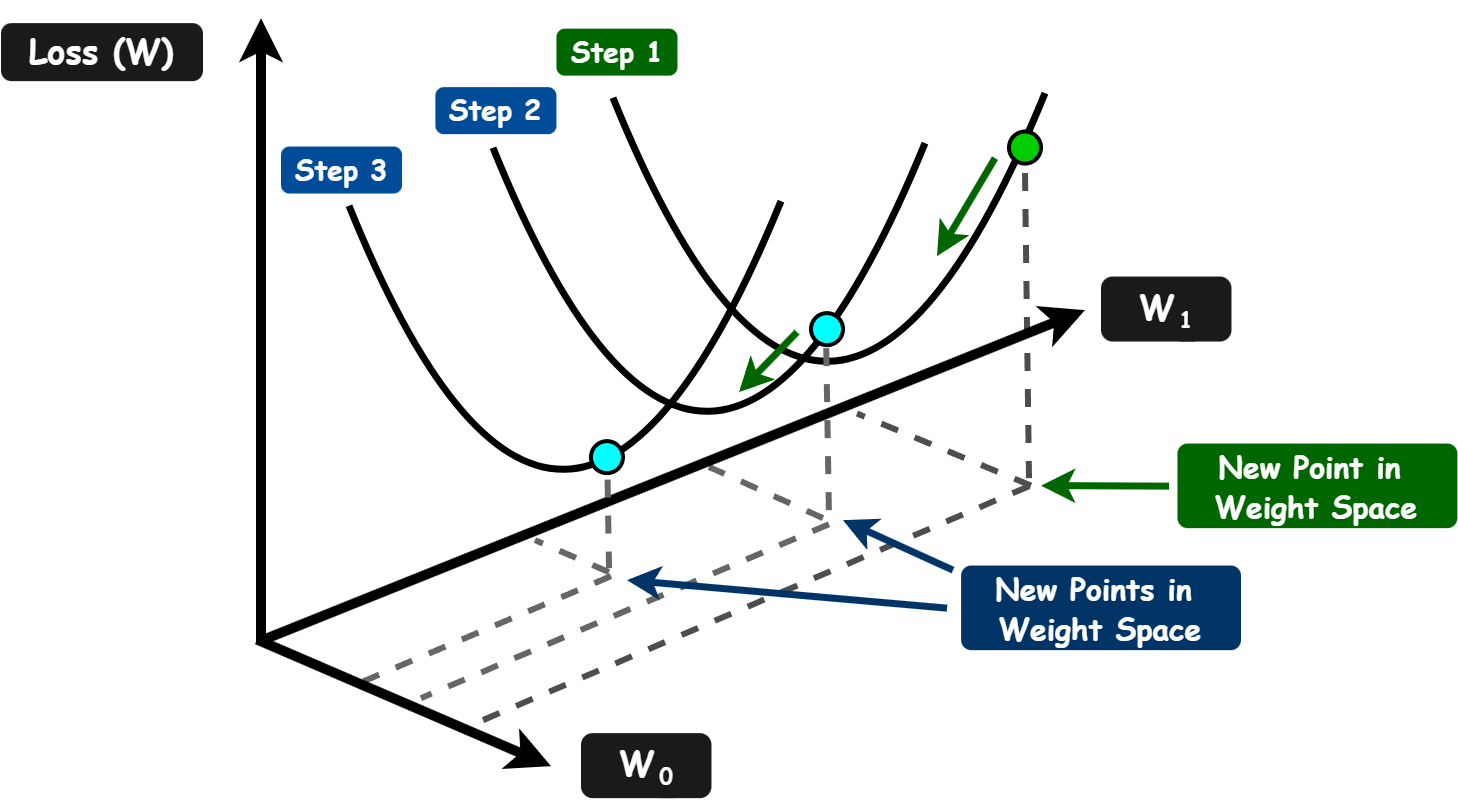

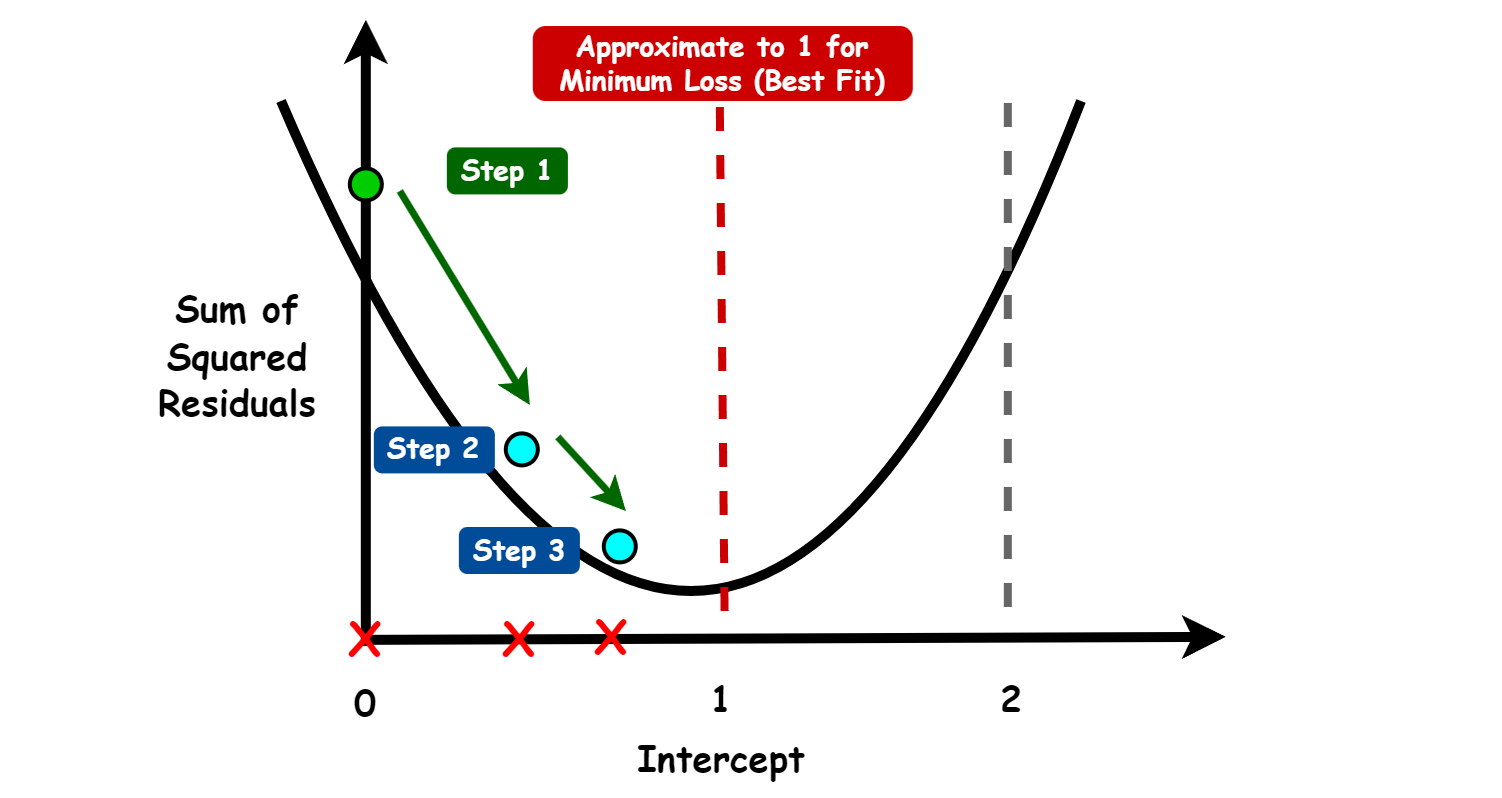

#### **Algorithm Overview**
The algorithm selects an initial value of the coefficients and iteratively moves each coefficient towards the minimum by following the negative direction of the gradient until the values converge.

**Gradient Descent Algorithm:**
1. **w⁰** ← any point in the parameter space
2. **Until convergence:**
   - For each **wᵢ** in **w**:
     - **wᵢᵗ⁺¹** ← **wᵢᵗ** - α ∂/∂wᵢ Loss(hw)

In the algorithm above, **α** represents a **learning rate constant** that controls how much the algorithm updates the coefficients at each step.

#### **Learning Rate (α) - The Step Size**
- **Too large:** Algorithm might overshoot the minimum and oscillate wildly
- **Too small:** Algorithm will take very long to converge
- **Just right:** Smooth, efficient convergence to the minimum

---

### **Gradient Descent for Univariate Linear Regression**

In univariate linear regression, we have the following identities for the gradients concerning **w₀** and **w₁**:

**Partial Derivatives:**
$$\frac{∂}{∂w_0}Loss(h_w) = -2(y - h_w(x))$$
$$\frac{∂}{∂w_1}Loss(h_w) = -2(y - h_w(x))x$$

**Update Rules for One Training Example (xⱼ, yⱼ):**
$$w_0^{t+1} ← w_0^t + α(y_j - h_w(x_j))$$
$$w_1^{t+1} ← w_1^t + α(y_j - h_w(x_j))x_j$$

**Update Rules for N Training Examples:**
$$w_0^{t+1} ← w_0^t + α\sum_{j=1}^{N}(y_j - h_w(x_j))$$
$$w_1^{t+1} ← w_1^t + α\sum_{j=1}^{N}(y_j - h_w(x_j))x_j$$

*Note: The factor of 2 from the derivative is absorbed into the learning rate α as a single constant.*

---

### **Gradient Descent for Multivariable Linear Regression**

Univariate linear regression is rarely sufficient for real-world applications. It's far more common to have multiple features requiring **multivariate linear regression**.

**Key Requirements:**
- We need a new coefficient for each new feature we add
- If we define a value **x₀ = 1** for all data points, we can write the linear function succinctly as a dot product between our feature vector **x** and coefficient vector **w**

**Mathematical Representation:**
$$h_w(x_j) = w_0 + w_1x_{j,1} + ... + w_mx_{j,m} = w_0 + \sum_{i=1}^{m}w_ix_{j,i}$$

**With x₀ = 1 for all samples:**
$$h_w(x_j) = w \cdot x = \sum_{i=0}^{m}w_ix_{j,i}$$

#### **Multivariable Update Rules**

The gradient descent update rules remain essentially unchanged when adding more features:

**Updates for One Training Example (xⱼ, yⱼ):**
$$w_i^{t+1} ← w_i^t + α(y_j - h_w(x_j))x_{j,i}$$

**Updates for N Training Examples:**
$$w_i^{t+1} ← w_i^t + α\sum_{j=1}^{N}(y_j - h_w(x_j))x_{j,i}$$

---

### **Summary: Gradient Descent**

#### **Why Gradient Descent Works**

| **Property** | **Description** |
|--------------|-----------------|
| **Convex Loss Function** | The sum of squares error creates a bowl-shaped surface with a single global minimum |
| **Gradient Direction** | The negative gradient always points toward the steepest descent |
| **Iterative Improvement** | Each step reduces the loss function value |
| **Convergence Guarantee** | For convex functions with appropriate learning rate, convergence to the global minimum is guaranteed |

#### **Practical Considerations**

| **Consideration** | **Description** |
|-------------------|-----------------|
| **Batch vs. Stochastic** | We can update weights after seeing all examples (batch) or after each example (stochastic) |
| **Feature Scaling** | Different feature scales can cause gradient descent to converge slowly |
| **Convergence Criteria** | Stop when the change in loss becomes negligibly small |
| **Local vs. Global Minima** | For linear regression, the loss function is convex, so any minimum found is the global minimum |

#### **Advantages of Gradient Descent**

| **Advantage** | **Description** |
|---------------|-----------------|
| **Large Dataset Efficiency** | Works well with large datasets where analytic solutions become computationally expensive |
| **Model Flexibility** | Generalizes to non-linear models where analytic solutions don't exist |
| **Memory Efficiency** | Memory efficient - doesn't require storing large matrices |
| **Scalability** | Can be parallelized for very large datasets |

---

### **Worked Example: Gradient Descent**

Given weight vector: **w** = (w₀ = 1, w₁ = 3, w₂ = -1)

**Dataset:**
| x₀ | x₁ | x₂ | y  | hᵨ(x) | y - hᵨ(x) |
|----|----|----|----| ------|----------- |
| 1  | 1  | 2  | 0  |   2   |     -2     |
| 1  | 5  | 3  | 12 |  13   |     -1     |
| 1  | 1  | 0  | 5  |   4   |      1     |

**Linear Regression Model:**
$$h_w(x) = w \cdot x = w_0x_0 + w_1x_1 + w_2x_2$$

where x₀ = 1 (bias term)

#### **Part 1: Predicted Values**

**For Row 1:** x = (1, 1, 2)
$$h_w(x_1) = 1 \times 1 + 3 \times 1 + (-1) \times 2 = 1 + 3 - 2 = 2$$

**For Row 2:** x = (1, 5, 3)
$$h_w(x_2) = 1 \times 1 + 3 \times 5 + (-1) \times 3 = 1 + 15 - 3 = 13$$

**For Row 3:** x = (1, 1, 0)
$$h_w(x_3) = 1 \times 1 + 3 \times 1 + (-1) \times 0 = 1 + 3 + 0 = 4$$

#### **Part 2: Gradient Descent Update (One Iteration)**

**Gradient Descent Update Rule:**
$w_i^{(t)} \leftarrow w_i^{(t-1)} + \alpha \sum_{j=1}^{n} (y_j - h_w(x_j)) x_{j,i}$

where α = 0.1 (learning rate)

**Initial weights:** w⁽⁰⁾ = (1, 3, -1)

**Calculate errors:**
- e₁ = y₁ - h_w(x₁) = 0 - 2 = -2
- e₂ = y₂ - h_w(x₂) = 12 - 13 = -1  
- e₃ = y₃ - h_w(x₃) = 5 - 4 = 1

**Update w₀ (bias term):**
$w_0^{(1)} = w_0^{(0)} + \alpha \sum_{j=1}^{3} (y_j - h_w(x_j)) \times 1$
$w_0^{(1)} = 1 + 0.1(-2 + (-1) + 1)$
$w_0^{(1)} = 1 + 0.1(-2) = 1 - 0.2 = 0.8$

**Update w₁:**
$w_1^{(1)} = w_1^{(0)} + \alpha \sum_{j=1}^{3} (y_j - h_w(x_j)) \times x_{j,1}$
$w_1^{(1)} = 3 + 0.1((-2) \times 1 + (-1) \times 5 + 1 \times 1)$
$w_1^{(1)} = 3 + 0.1(-2 - 5 + 1) = 3 + 0.1(-6) = 3 - 0.6 = 2.4$

**Update w₂:**
$w_2^{(1)} = w_2^{(0)} + \alpha \sum_{j=1}^{3} (y_j - h_w(x_j)) \times x_{j,2}$
$w_2^{(1)} = -1 + 0.1((-2) \times 2 + (-1) \times 3 + 1 \times 0)$
$w_2^{(1)} = -1 + 0.1(-4 - 3 + 0) = -1 + 0.1(-7) = -1 - 0.7 = -1.7$

#### **First Iteration: After one iteration of gradient descent:**
$$w^{(1)} = (0.98, 2.94, -1.07)$$

<br>

#### **Second Iteration of Gradient Descent**

**Starting weights:** w^(1) = (0.98, 2.94, -1.07)

**New predictions with updated weights:**
- h_w(x₁) = 0.98 × 1 + 2.94 × 1 + (-1.07) × 2 = 0.98 + 2.94 - 2.14 = 1.78
- h_w(x₂) = 0.98 × 1 + 2.94 × 5 + (-1.07) × 3 = 0.98 + 14.7 - 3.21 = 12.47  
- h_w(x₃) = 0.98 × 1 + 2.94 × 1 + (-1.07) × 0 = 0.98 + 2.94 + 0 = 3.92

**New errors:**
- e₁ = 0 - 1.78 = -1.78
- e₂ = 12 - 12.47 = -0.47
- e₃ = 5 - 3.92 = 1.08

**Update w₀ for second iteration:**
$w_0^{(2)} = 0.98 + 0.01(-1.78 + (-0.47) + 1.08) = 0.98 + 0.01(-1.17) = 0.9683$

**Update w₁ for second iteration:**  
$w_1^{(2)} = 2.94 + 0.01((-1.78)(1) + (-0.47)(5) + (1.08)(1)) = 2.94 + 0.01(-3.05) = 2.9095$

**Update w₂ for second iteration:**
$w_2^{(2)} = -1.07 + 0.01((-1.78)(2) + (-0.47)(3) + (1.08)(0)) = -1.07 + 0.01(-4.97) = -1.1197$

**Second Iteration:After second iteration:**
$$w^{(2)} = (0.9683, 2.9095, -1.1197)$$


